In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/company-data-decision-tree/Company_Data.csv


In [3]:
raw_data = pd.read_csv("Company_Data.csv")
raw_data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
raw_data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [6]:
raw_data['Sales'].nunique()

336

In [7]:
raw_data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [8]:
raw_data.corr().style.background_gradient(cmap='coolwarm')

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


<AxesSubplot:>

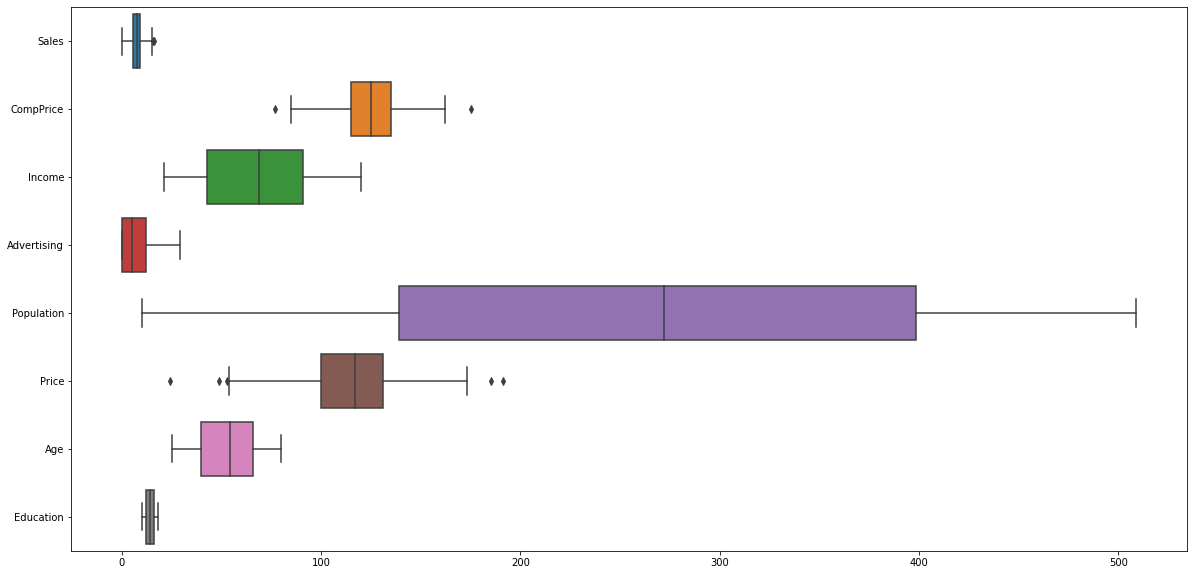

In [9]:
plt.figure(figsize=(20,10))
sns.boxplot(data=raw_data, orient="h")

<AxesSubplot:xlabel='Sales', ylabel='Count'>

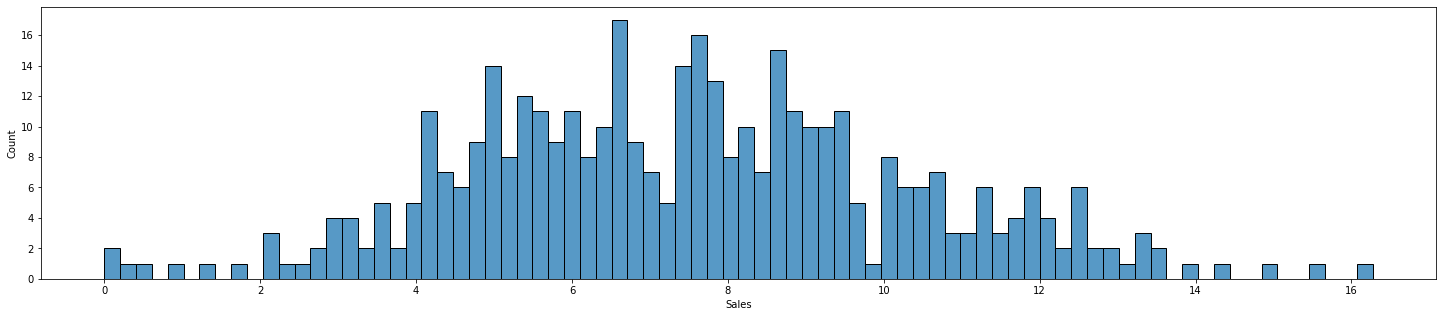

In [10]:
plt.figure(figsize=(25,5))
sns.histplot(data=raw_data, x='Sales', bins=80)

In [11]:
x = raw_data['Sales'].max()

In [12]:
print(x, x/2, x/3)

16.27 8.135 5.423333333333333


In [13]:
data=raw_data.copy()
data['Sales_cat'] = pd.cut(x = data['Sales'], bins = [0,5.424,8.2,16.3], labels=['Low','Medium','High'], right = False)
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_cat
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,High
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Medium
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Low


In [14]:
print(data['Sales_cat'].value_counts())
print(data['Urban'].value_counts())
print(data['US'].value_counts())
print(data['ShelveLoc'].value_counts())

High      156
Medium    142
Low       102
Name: Sales_cat, dtype: int64
Yes    282
No     118
Name: Urban, dtype: int64
Yes    258
No     142
Name: US, dtype: int64
Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64


In [16]:
df = data.drop('Sales',axis=1)
df = pd.get_dummies(df.iloc[:,:-1])
df.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0


In [17]:
df['Sales_cat'] = data['Sales_cat']

In [18]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
le = preprocessing.LabelEncoder()
le.fit(df["Sales_cat"])
df['Sales_cat'] = le.transform(df["Sales_cat"]
df.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,Sales_cat
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1,0
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1,0
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1,0
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1,2
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0,1


In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [20]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1:]

In [21]:
df.shape, X.shape, Y.shape

((400, 15), (400, 14), (400, 1))

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=7, stratify=Y)

In [23]:
dt_clf_1 = DecisionTreeClassifier(criterion='gini', max_depth=7, min_samples_leaf=2, min_samples_split=2, splitter='random')
dt_clf_1 = dt_clf_1.fit(X_train,Y_train)
Y_pred = dt_clf_1.predict(X_test)

In [24]:
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

Accuracy: 0.5083333333333333
[[31  3 13]
 [ 5 10 15]
 [14  9 20]]
              precision    recall  f1-score   support

           0       0.62      0.66      0.64        47
           1       0.45      0.33      0.38        30
           2       0.42      0.47      0.44        43

    accuracy                           0.51       120
   macro avg       0.50      0.49      0.49       120
weighted avg       0.51      0.51      0.50       120



In [25]:
dt_clf_2 = DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=2, min_samples_split=2, splitter='random')
dt_clf_2 = dt_clf_2.fit(X_train,Y_train)
Y_pred = dt_clf_2.predict(X_test)
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

Accuracy: 0.5916666666666667
[[33  6  8]
 [ 3 21  6]
 [11 15 17]]
              precision    recall  f1-score   support

           0       0.70      0.70      0.70        47
           1       0.50      0.70      0.58        30
           2       0.55      0.40      0.46        43

    accuracy                           0.59       120
   macro avg       0.58      0.60      0.58       120
weighted avg       0.60      0.59      0.59       120



[Text(0.5932692307692308, 0.9375, 'X[8] <= 0.054\nentropy = 1.564\nsamples = 280\nvalue = [109, 72, 99]'),
 Text(0.29423076923076924, 0.8125, 'X[4] <= 97.207\nentropy = 1.574\nsamples = 222\nvalue = [65, 70, 87]'),
 Text(0.1346153846153846, 0.6875, 'X[5] <= 75.665\nentropy = 1.313\nsamples = 52\nvalue = [25, 4, 23]'),
 Text(0.08461538461538462, 0.5625, 'X[0] <= 91.369\nentropy = 1.325\nsamples = 45\nvalue = [24, 4, 17]'),
 Text(0.03076923076923077, 0.4375, 'X[10] <= 0.064\nentropy = 0.811\nsamples = 4\nvalue = [3, 1, 0]'),
 Text(0.015384615384615385, 0.3125, 'entropy = 1.0\nsamples = 2\nvalue = [1, 1, 0]'),
 Text(0.046153846153846156, 0.3125, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0, 0]'),
 Text(0.13846153846153847, 0.4375, 'X[7] <= 0.841\nentropy = 1.297\nsamples = 41\nvalue = [21, 3, 17]'),
 Text(0.07692307692307693, 0.3125, 'X[2] <= 1.322\nentropy = 1.124\nsamples = 25\nvalue = [16, 1, 8]'),
 Text(0.046153846153846156, 0.1875, 'X[1] <= 29.098\nentropy = 1.361\nsamples = 10\nvalue 

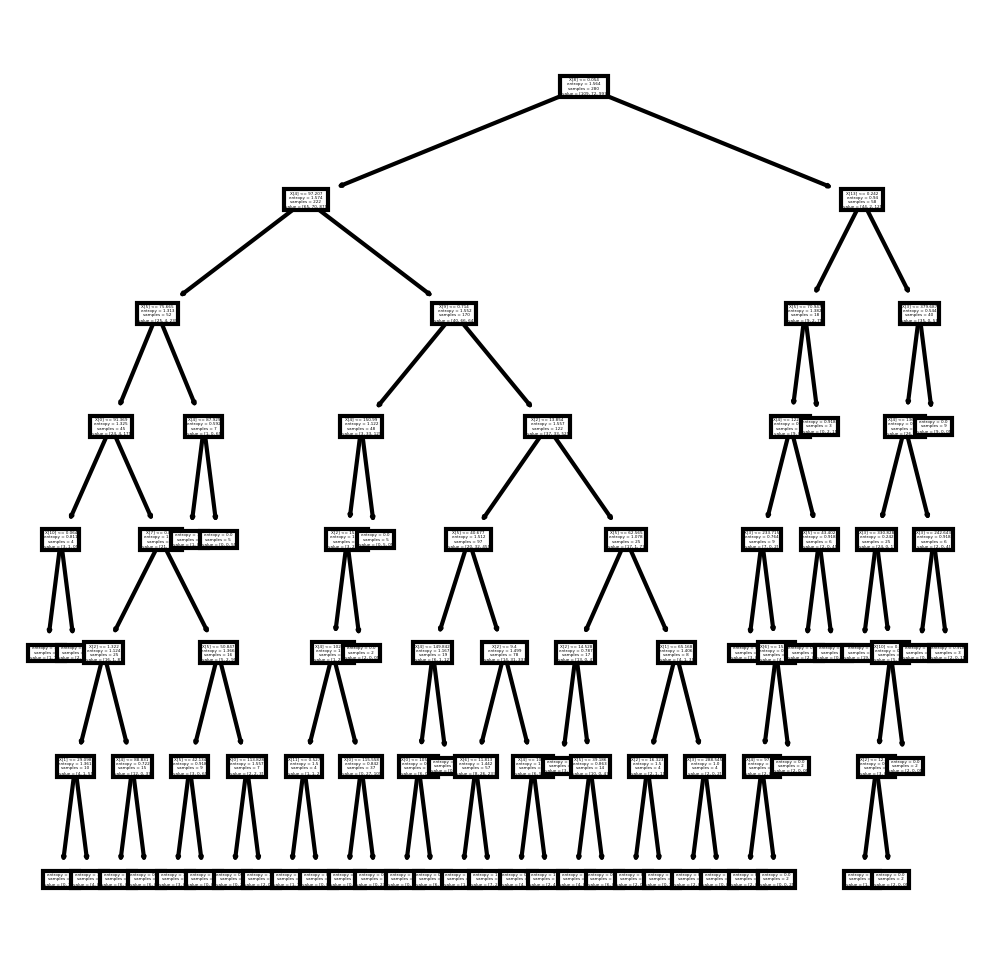

In [26]:
from sklearn import tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(dt_clf_2)